# <b>1 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [38]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# <b>2 <span style ='color:#0386f7de'>|</span> Building the model</b>

In [39]:
model = torchvision.models.detection.retinanet_resnet50_fpn(
    weights=torchvision.models.detection.RetinaNet_ResNet50_FPN_Weights.COCO_V1
)

In [40]:
model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


# <b>3 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [41]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'
ig = Image.open("/content/000000037777.jpg")

--2024-10-24 03:44:52--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.12.108, 52.216.136.244, 16.15.178.163, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.12.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg.3’

000000037777.jpg.3  100%[===================>]  39.88K  --.-KB/s    in 0.06s   

2024-10-24 03:44:52 (638 KB/s) - ‘000000037777.jpg.3’ saved [40833/40833]



# <b>4 <span style ='color:#0386f7de'>|</span> Training the model</b>

In [42]:
transform = T.ToTensor()
img = transform(ig)

In [43]:
with torch.no_grad():
  prediction = model([img])

In [44]:
bboxes, scores, labels = prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']

In [45]:
num = torch.argwhere(scores > 0.6).shape[0]

In [46]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]


In [47]:
igg = cv2.imread("/content/000000037777.jpg")
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# <b>5 <span style ='color:#0386f7de'>|</span> Model results</b>

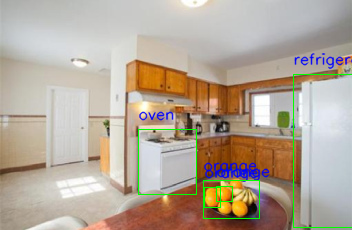

In [48]:
cv2_imshow(igg)